# Load Packages and Project Path

In [1]:
import os
import sys, importlib
from functools import reduce
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path of the exploratory analysis project
project_path=os.path.dirname(os.path.abspath(''))

In [3]:
project_path

'/Users/ezratampubolon/PythonProjects/exploratory-analysis'

In [4]:
os.path.join(project_path)

'/Users/ezratampubolon/PythonProjects/exploratory-analysis'

In [5]:
# Append the path to the exploratory-analysis which is in the parent directory
# In the folder exploratory-analysis
sys.path.append(project_path)
import exploratory_analysis as ea

# Load Data and Preprocess

In [6]:
# We use the superstore data saved in the data folder
# https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

superstore_data_path=os.path.join(project_path,"data","superstore.xls")

# Import data
dict_df=ea.import_to_pds(superstore_data_path)

# Print list of loaded tavles
print(f"List of tables: {list(dict_df.keys())}")

# Define dataframe variables
df_orders=dict_df["Orders"]
df_people=dict_df["People"]
df_returns=dict_df["Returns"]

List of tables: ['Orders', 'People', 'Returns']


In [7]:
df_orders=ea.year_month_day_col(df_orders,"Order Date")

df_orders['Days Until Shipping'] = (df_orders['Ship Date'] - df_orders['Order Date']) / np.timedelta64(1, 'D')
df_orders['Days Until Shipping']=df_orders['Days Until Shipping'].astype(int)

df_orders=df_orders.merge(df_returns, on=['Order ID'], how='left')
df_orders["Returned"]=df_orders["Returned"].fillna("No")
df_orders.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product Name,Sales,Quantity,Discount,Profit,year,month,day,Days Until Shipping,Returned
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2019,1,3,4,No


In [8]:
# Columns to one-hot-encode 
li_one_hot=["Ship Mode","Segment","Region","Sub-Category","Returned"]

In [9]:
# One-Hot-Encode
one_hot_result=ea.one_hot_encode(df_input=df_orders,li_one_hot=li_one_hot)
df_orders=one_hot_result["df_result"]
dummies_dict=one_hot_result["dummies_dict"]

In [10]:
# Columns to drop
li_drop_corr=["Row ID","Order ID", "Order Date","Ship Date","Customer ID","Customer Name","Country/Region","State/Province","City","Postal Code","Product ID","Category","Product Name","year","month","day"]
# Drop the corresponding columns
df_for_corr=df_orders.drop(columns=li_drop_corr)

# Graph Correlation

In [11]:
filtered_df=ea.show_corr_matrix_filtered(df_input=df_for_corr,by_which="plotly")

In [12]:
type(adjacency_matrix)

NameError: name 'adjacency_matrix' is not defined

In [13]:
adjacency_matrix=filtered_df["corr_filtered"].fillna(0)
adjacency_matrix

,Sales,Quantity,Discount,Profit,Days Until Shipping,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,...,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Furnishings,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Tables,Returned_No,Returned_Yes
Sales,0.000000,0.210156,0.000000,0.493814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.139358,0.278211,0.000000,0.230978,-0.113653,0.000000,0.000000,0.114364,0.000000,0.000000
Quantity,0.210156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Discount,0.000000,0.000000,0.000000,-0.219336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.170624,0.000000,-0.120738,0.102832,0.000000,0.000000
Profit,0.493814,0.000000,-0.219336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.292124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Days Until Shipping,0.000000,0.000000,0.000000,0.000000,0.000000,-0.408114,-0.579380,-0.171324,0.735503,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ship Mode_First Class,0.000000,0.000000,0.000000,0.000000,-0.408114,0.000000,-0.117661,-0.204097,-0.520582,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ship Mode_Same Day,0.000000,0.000000,0.000000,0.000000,-0.579380,-0.117661,0.000000,-0.128277,-0.327191,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.117552,0.117552
Ship Mode_Second Class,0.000000,0.000000,0.000000,0.000000,-0.171324,-0.204097,-0.128277,0.000000,-0.567554,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ship Mode_Standard Class,0.000000,0.000000,0.000000,0.000000,0.735503,-0.520582,-0.327191,-0.567554,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Segment_Consumer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
adjacency_matrix=filtered_df["corr_filtered"].fillna(0)
dict_labels={list(adjacency_matrix.columns).index(col):col for col in list(adjacency_matrix.columns)}
adjacency_matrix=adjacency_matrix.to_numpy()

In [15]:
adjacency_matrix.shape[0]

29

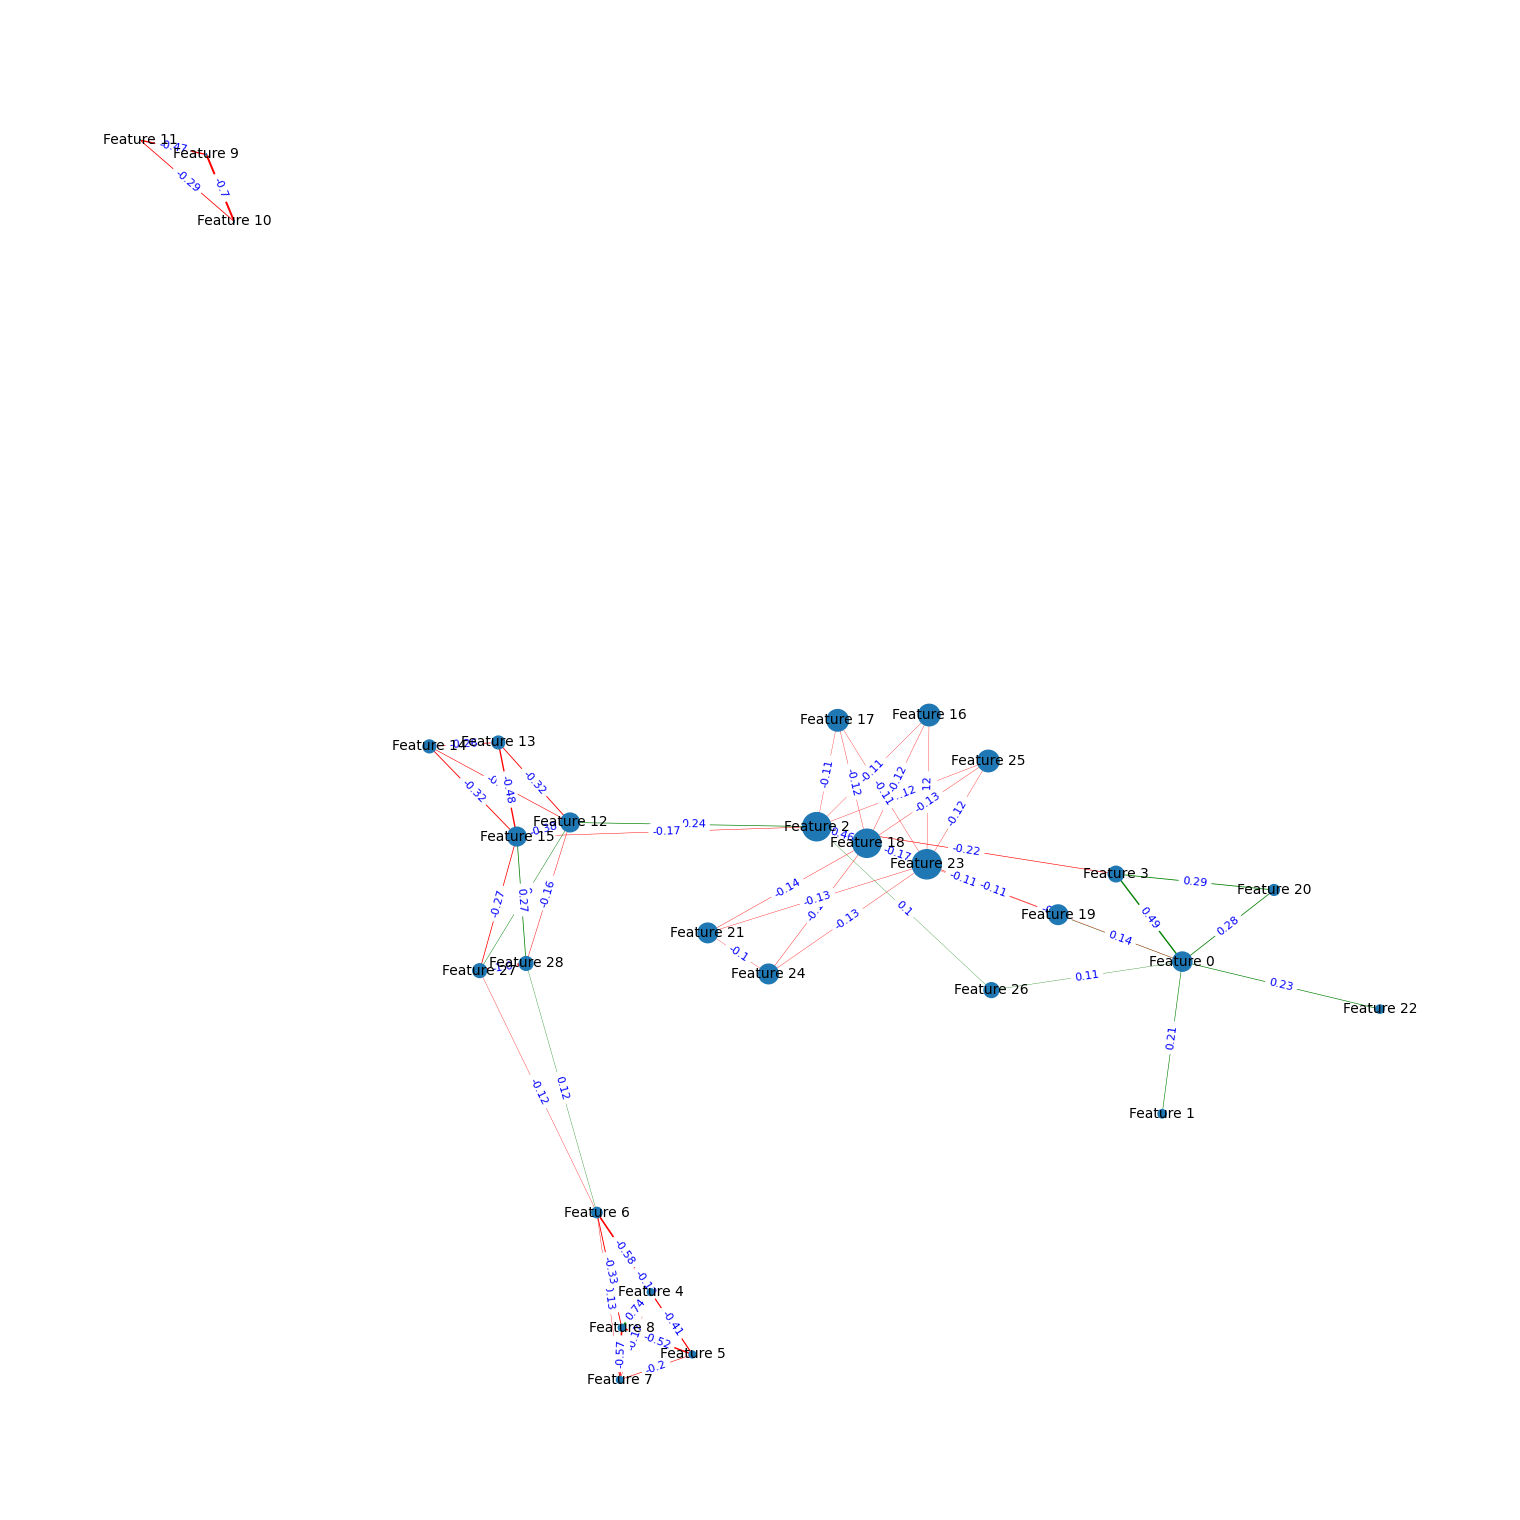

In [17]:

ea.GraphFromAdjacencyMatrix(
        adjacency_matrix=adjacency_matrix,centrality='eigenvector').plot_sns()

In [18]:

ea.GraphFromAdjacencyMatrix(
        df_adjacency=filtered_df["corr_filtered"].fillna(0),centrality='eigenvector').plot_plotly()

In [19]:

ea.GraphFromAdjacencyMatrix(
        adjacency_matrix=adjacency_matrix,
        node_labels=dict_labels,centrality='eigenvector').plot_plotly()

In [20]:
ea.GraphFromAdjacencyMatrix(
        adjacency_matrix=adjacency_matrix,centrality='eigenvector').plot_plotly()

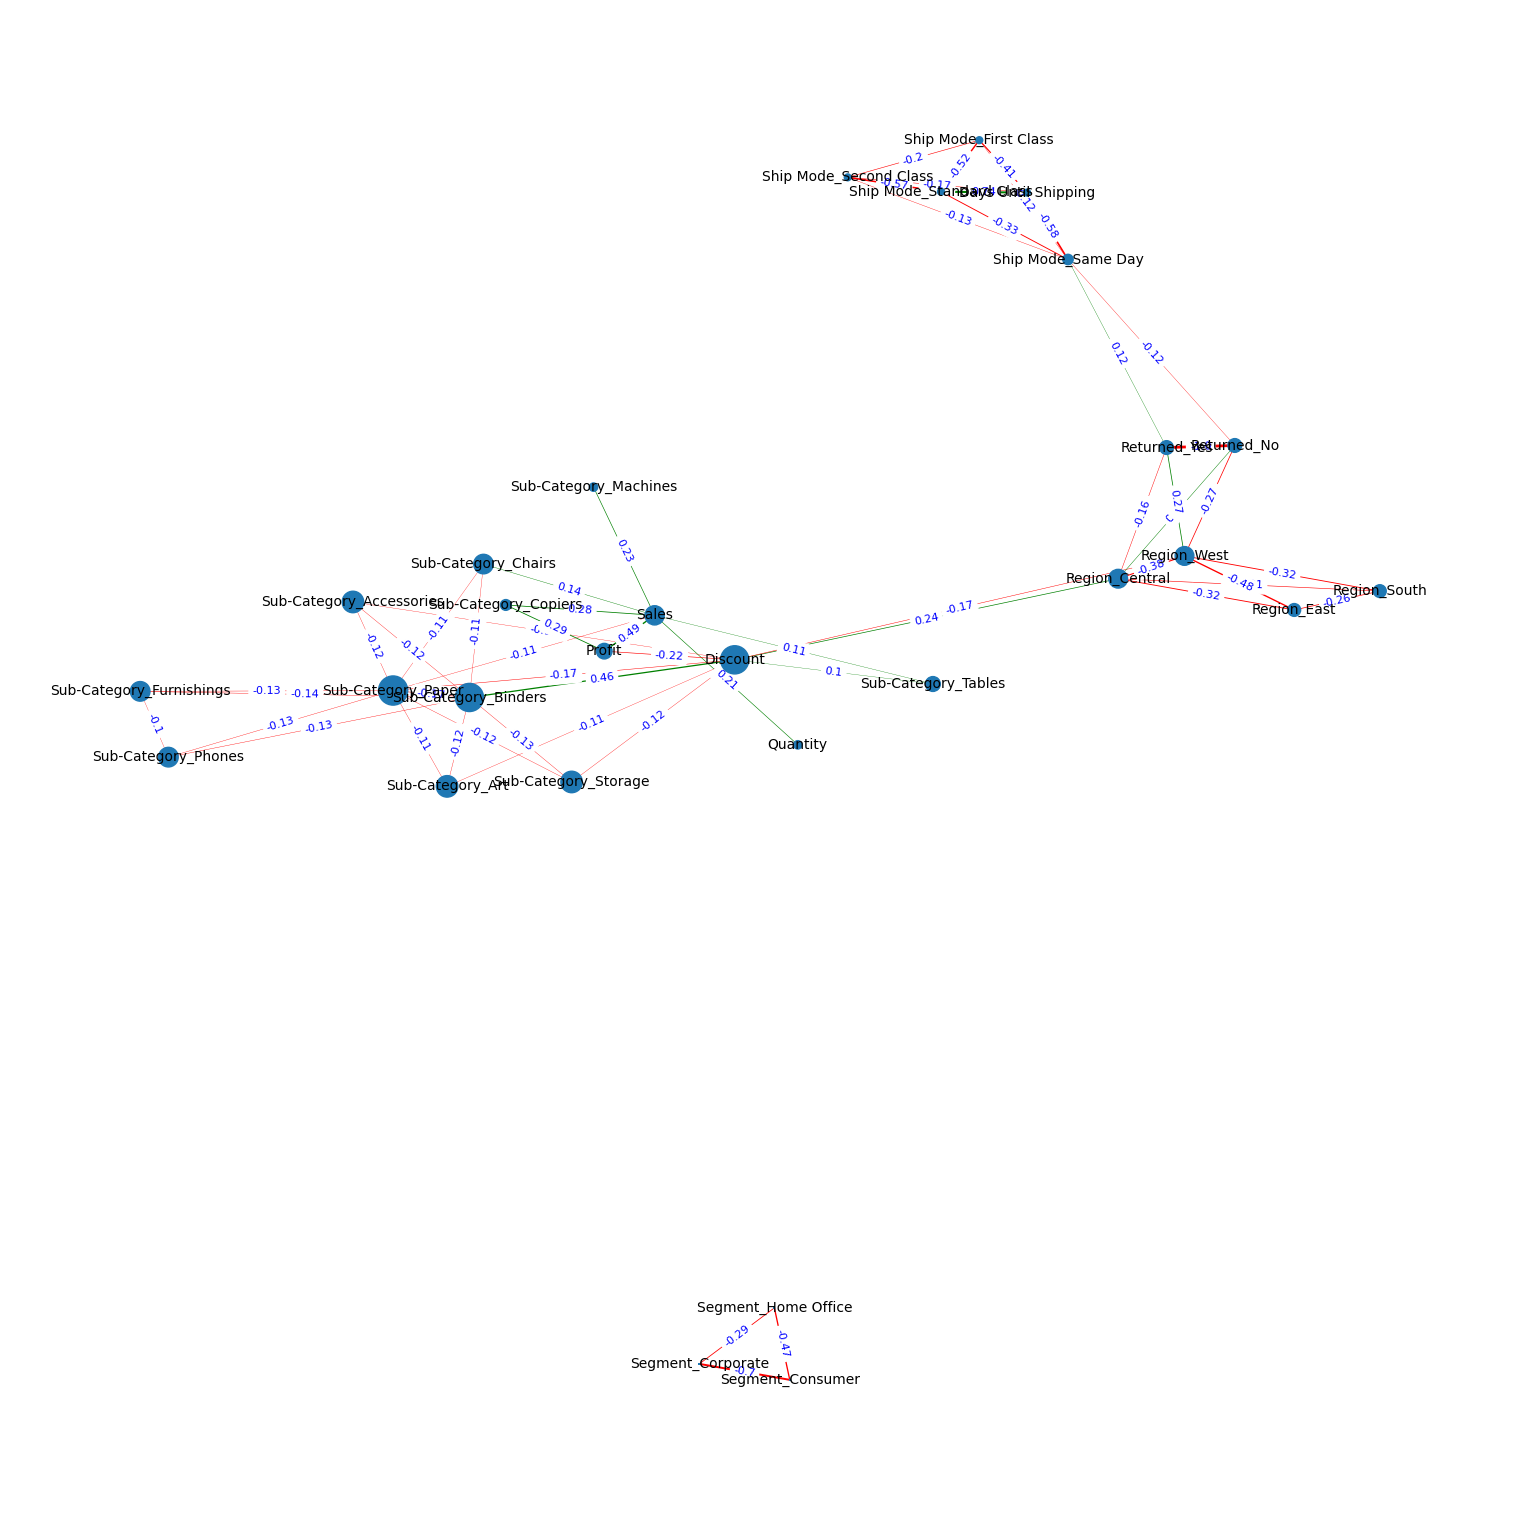

In [21]:

ea.GraphFromAdjacencyMatrix(
        df_adjacency=filtered_df["corr_filtered"].fillna(0),centrality='eigenvector').plot_sns()